In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import scipy.stats as stats



receiving_2010 = pd.read_csv('data/Receiving_2010.csv')
receiving_2011 = pd.read_csv('data/Receiving_2011.csv')
receiving_2012 = pd.read_csv('data/Receiving_2012.csv')
receiving_2013 = pd.read_csv('data/Receiving_2013.csv')
receiving_2014 = pd.read_csv('data/Receiving_2014.csv')
receiving_2015 = pd.read_csv('data/Receiving_2015.csv')
receiving_2016 = pd.read_csv('data/Receiving_2016.csv')
receiving_2017 = pd.read_csv('data/Receiving_2017.csv')
receiving_2018 = pd.read_csv('data/Receiving_2018.csv')
receiving_2019 = pd.read_csv('data/Receiving_2019.csv')
receive_lst = [receiving_2010, receiving_2011, receiving_2012,receiving_2013,receiving_2014,receiving_2015,receiving_2016,receiving_2017,receiving_2018,receiving_2019]
receiving_2010.dtypes

Player     object
Tm         object
Age         int64
Pos        object
G           int64
GS          int64
Tgt         int64
Rec         int64
Ctch%      object
Yds         int64
Y/R       float64
TD          int64
1D          int64
Lng         int64
Y/Tgt     float64
R/G       float64
Y/G       float64
Fmb         int64
Height     object
Weight     object
dtype: object

In [8]:
def ctch(s):
    return float(s)
def percent2float(x):
    return float(x.strip().strip('%'))/100   
def height_val(s):
    feet, inches = s.split('-')
    return int(feet)*12 + int(inches)

height_val('6-0')

72

In [9]:
receiving_2010.size
receiving_2010.head()
#to drop col receiving_2010.drop('G',axis=1)

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,Height,Weight
0,Roddy White*+,ATL,29,WR,16,16,179,115,64.2%,1389,12.1,10,73,46,7.8,7.2,86.8,1,6-0,211lb
1,Reggie Wayne*+,IND,32,WR,16,16,175,111,63.4%,1355,12.2,6,72,50,7.7,6.9,84.7,1,6-0,203lb
2,Jason Witten*+,DAL,28,TE,16,16,128,94,73.4%,1002,10.7,9,42,33,7.8,5.9,62.6,1,6-6,263lb
3,Santana Moss,WAS,31,WR,16,16,145,93,64.1%,1115,12.0,6,61,56,7.7,5.8,69.7,3,5-10,193lb
4,Larry Fitzgerald*,ARI,27,WR,16,15,173,90,52.0%,1137,12.6,6,58,41,6.6,5.6,71.1,0,6-3,218lb


In [10]:
for df in receive_lst:
    df['Ctch%'] = df['Ctch%'].apply(percent2float)
    df['Height'] = df.Height.apply(height_val)
    df['Weight'] = df.Weight.str.slice(0,3).astype(float)
    df['BMI'] = 703 * df['Weight']/((df['Height'])**2)
    df.sort_values(by='Height', inplace=True)
receiving_2010.head()

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,...,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,Height,Weight,BMI
45,Darren Sproles,SDG,27,NaN,16,3,75,59,0.787,520,...,2,25,57,6.9,3.7,32.5,3,66,190.0,30.663453
31,Mike Thomas,JAX,23,WR,16,11,102,66,0.647,820,...,4,38,50,8.0,4.1,51.3,3,68,187.0,28.430147
38,Deion Branch,2TM,31,NaN,15,12,92,61,0.663,818,...,6,0,79,8.9,4.1,54.5,1,69,195.0,28.793321
37,Ray Rice,BAL,23,RB,16,14,83,63,0.759,556,...,1,23,34,6.7,3.9,34.8,0,69,195.0,28.793321
7,Wes Welker*,NWE,29,WR,15,11,123,86,0.699,848,...,7,47,35,6.9,5.7,56.5,1,69,185.0,27.316740


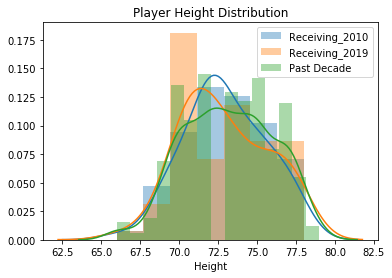

In [16]:
ax = sns.distplot(receiving_2010.Height, label='Receiving_2010')
sns.distplot(receiving_2019.Height, label='Receiving_2019')
sns.distplot(past_decade.Height, label='Past Decade')
ax.set_title('Player Height Distribution')
plt.legend()
plt.show()

In [13]:
past_decade = pd.concat(receive_lst)
past_decade

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,...,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,Height,Weight,BMI
45,Darren Sproles,SDG,27,NaN,16,3,75,59,0.787,520,...,2,25,57,6.9,3.7,32.5,3,66,190.0,30.663453
31,Mike Thomas,JAX,23,WR,16,11,102,66,0.647,820,...,4,38,50,8.0,4.1,51.3,3,68,187.0,28.430147
38,Deion Branch,2TM,31,NaN,15,12,92,61,0.663,818,...,6,0,79,8.9,4.1,54.5,1,69,195.0,28.793321
37,Ray Rice,BAL,23,RB,16,14,83,63,0.759,556,...,1,23,34,6.7,3.9,34.8,0,69,195.0,28.793321
7,Wes Welker*,NWE,29,WR,15,11,123,86,0.699,848,...,7,47,35,6.9,5.7,56.5,1,69,185.0,27.316740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,Mike Evans*,TAM,26,WR,13,13,118,67,0.568,1157,...,8,54,67,9.8,5.2,89.0,0,77,231.0,27.389610
33,Tyler Higbee,LAR,26,TE,15,15,89,69,0.775,734,...,3,36,33,8.2,4.6,48.9,0,78,255.0,29.464990
68,Mike Gesicki,MIA,24,te,16,5,89,51,0.573,570,...,5,25,34,6.4,3.2,35.6,1,78,250.0,28.887245
11,Darren Waller,OAK,27,TE,16,16,117,90,0.769,1145,...,3,53,75,9.8,5.6,71.6,1,78,255.0,29.464990


In [31]:
past_decade.columns

Index(['Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'Tgt', 'Rec', 'Ctch%', 'Yds',
       'Y/R', 'TD', '1D', 'Lng', 'Y/Tgt', 'R/G', 'Y/G', 'Fmb', 'Height',
       'Weight', 'BMI'],
      dtype='object')

In [9]:
past_decade.groupby(past_decade.Height<=70)


In [10]:
past_decade.Player.nunique()

377

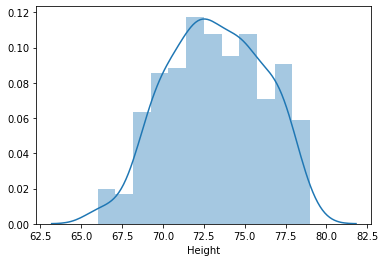

In [11]:
all_players = past_decade.groupby('Player').last().Height
sns.distplot(all_players)

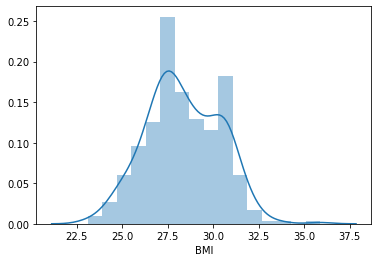

In [12]:
all_players = past_decade.groupby('Player').last().BMI
sns.distplot(all_players)

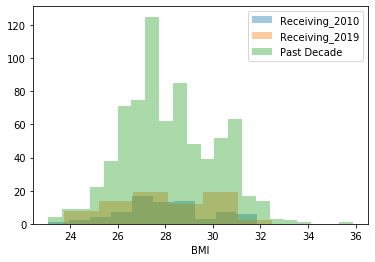

In [17]:
sns.distplot(receiving_2010.BMI, label='Receiving_2010', kde=False )
sns.distplot(receiving_2019.BMI, label='Receiving_2019', kde=False )
sns.distplot(past_decade.BMI, label='Past Decade', kde=False )
plt.legend()
plt.show()

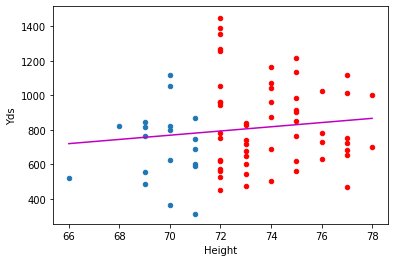

In [19]:
ax = receiving_2010[receiving_2010.Height<=71].plot.scatter('Height', 'Yds')
receiving_2010[receiving_2010.Height>71].plot.scatter('Height', 'Yds',ax=ax, c='r')
m, b, _,_,_=stats.linregress(receiving_2010.Height,receiving_2010.Yds)
x=numpy.linspace(receiving_2010.Height.min(),receiving_2010.Height.max(),2)
y=m*x +b
ax.plot(x,y,c='m')


In [21]:
short = receiving_2010[receiving_2010.Height<=71]
tall = receiving_2010[receiving_2010.Height>71]
stats.ttest_ind(short.Yds, tall.Yds)

Ttest_indResult(statistic=-2.0703729121065173, pvalue=0.04200448038886529)

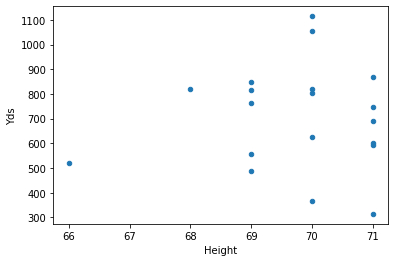

In [19]:
receiving_2010[receiving_2010.Height<72].plot.scatter('Height', 'Yds')

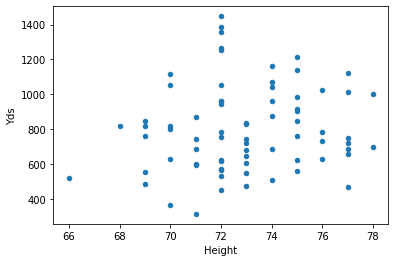

In [20]:
receiving_2010.plot.scatter('Height', 'Yds')

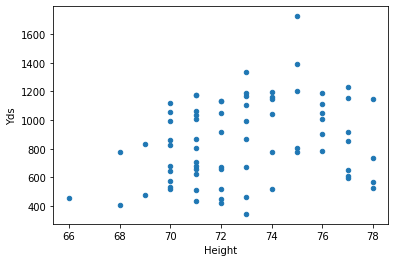

In [21]:
receiving_2019.plot.scatter('Height', 'Yds')

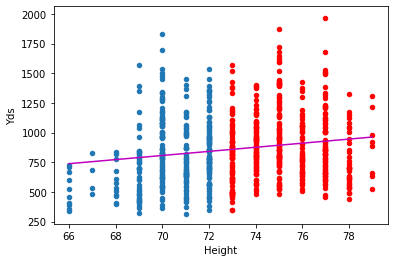

In [25]:
#past_decade.plot.scatter('Height','Yds')
ax = past_decade[past_decade.Height<=72].plot.scatter('Height', 'Yds')
past_decade[past_decade.Height>72].plot.scatter('Height', 'Yds',ax=ax, c='r')
m, b, _,_,_=stats.linregress(past_decade.Height,past_decade.Yds)
x=numpy.linspace(past_decade.Height.min(),past_decade.Height.max(),2)
y=m*x +b
ax.plot(x,y,c='m')

In [24]:
short = past_decade[past_decade.Height<=72]
tall = past_decade[past_decade.Height>72]
stats.ttest_ind(short.Yds, tall.Yds)

Ttest_indResult(statistic=-3.800068530138062, pvalue=0.00015657965264744876)

/Users/aneesshaikh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  


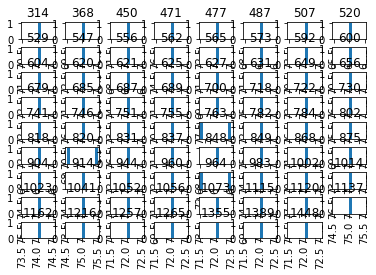

In [23]:
#how to put all years next to each other histogram/line
receiving_2010.hist('Height', 'Yds')


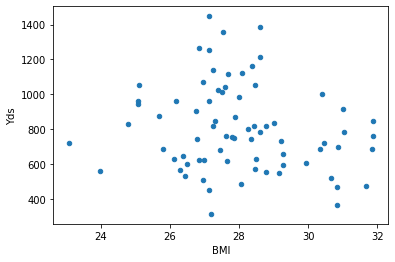

In [24]:
receiving_2010.plot.scatter('BMI', 'Yds')

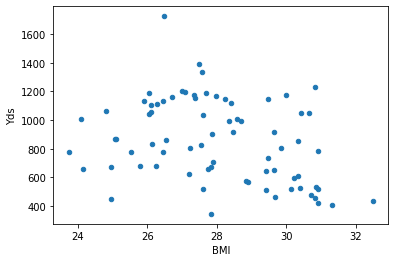

In [25]:
receiving_2019.plot.scatter('BMI', 'Yds')

Ttest_indResult(statistic=11.477949213610835, pvalue=3.5632762938208534e-28)

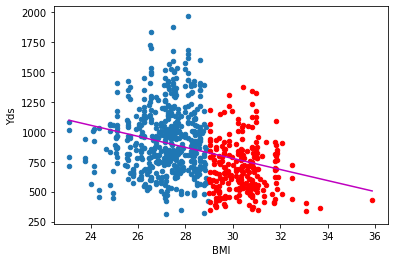

In [30]:
#past_decade.plot.scatter('BMI','Yds')
cutoff = 29
ax = past_decade[past_decade.BMI<=cutoff].plot.scatter('BMI', 'Yds')
past_decade[past_decade.BMI>cutoff].plot.scatter('BMI', 'Yds',ax=ax, c='r')
m, b, _,_,_=stats.linregress(past_decade.BMI,past_decade.Yds)
x=numpy.linspace(past_decade.BMI.min(),past_decade.BMI.max(),2)
y=m*x +b
ax.plot(x,y,c='m')
low_bmi  = past_decade[past_decade.BMI<=cutoff]
high_bmi = past_decade[past_decade.BMI>cutoff]
stats.ttest_ind(low_bmi.Yds, high_bmi.Yds)

In [35]:
past_decade.columns

Index(['Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'Tgt', 'Rec', 'Ctch%', 'Yds',
       'Y/R', 'TD', '1D', 'Lng', 'Y/Tgt', 'R/G', 'Y/G', 'Fmb', 'Height',
       'Weight', 'BMI'],
      dtype='object')

Ttest_indResult(statistic=11.477949213610835, pvalue=3.5632762938208534e-28)
Ttest_indResult(statistic=5.0431861539840925, pvalue=5.767648419362185e-07)
Ttest_indResult(statistic=-5.521555449338687, pvalue=4.6571580362141426e-08)


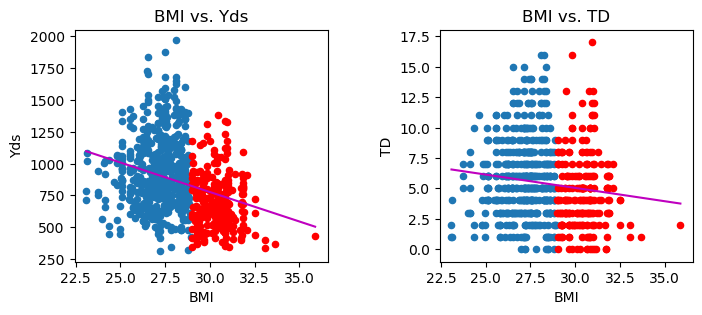

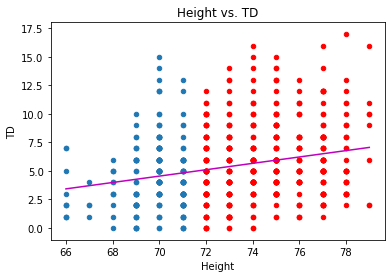

In [56]:
def plot_sig(df, trait, cutoff, perf_metric, ax=None):
    ax = df[df[trait]<=cutoff].plot.scatter(trait, perf_metric, ax=ax)
    df[df[trait]>cutoff].plot.scatter(trait, perf_metric,ax=ax, c='r')
    m, b, _,_,_=stats.linregress(df[trait],df[perf_metric])
    x=numpy.linspace(df[trait].min(),df[trait].max(),2)
    y=m*x +b
    ax.plot(x,y,c='m')
    ax.set_title(f'{trait} vs. {perf_metric}')
    low  = df[df[trait]<=cutoff]
    high = df[df[trait]>cutoff]
    print(stats.ttest_ind(low[perf_metric], high[perf_metric]))
    
fig = plt.figure(
    figsize=(8,4),  # overall fig size, inches width,height. Contains all subplots.
    dpi=100,          # resolution; default=100
    facecolor='w',    # background color; default='w', white
    edgecolor='b',    # frame color; default='w'
    frameon=True,     # draw frame; default=True
    clear=False,      # if True, clears previous figure; default=False     
) 
ax = fig.subplots(1, 2, ) # sharex='col', sharey='row')
plt.tight_layout(5.0)
plot_sig(past_decade, 'BMI', 29, 'Yds', ax[0])
plot_sig(past_decade, 'BMI', 29, 'TD', ax[1])

plot_sig(past_decade, 'Height', 71, 'TD')

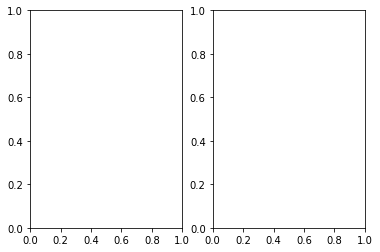

In [41]:
fig, ax = plt.subplots(1, 2) # sharex='col', sharey='row')
ax[0]

In [27]:
#need to do ttest on tall/short,heavy/light for each stat
#stats.ttest_ind(tall,short)

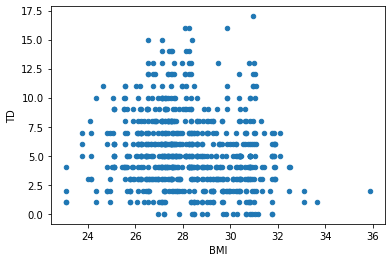

In [28]:
past_decade.plot.scatter('BMI','TD')

In [36]:
short = receiving_2010[receiving_2010.BMI<=27.5]
tall = receiving_2010[receiving_2010.BMI>27.5]
stats.ttest_ind(short['Y/G'], tall['Y/G'])

Ttest_indResult(statistic=0.5764532062274943, pvalue=0.5661066848410786)

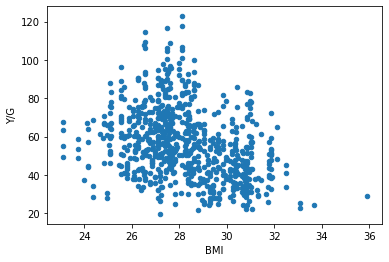

In [34]:
past_decade.plot.scatter('BMI','Y/G')

In [38]:
past_decade.plot.scatter('BMI','Ctch%')

ValueError: scatter requires y column to be numeric